In [1]:
import random
import copy
import logging
import sys
import glob

# from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_220726_across_noise_uniform'

data_script = 'batch_220726a_across_noise'
db_path = '/n/groups/htem_cache/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'


scaled_noise = 0
core_noise = 0
n_grcs = 1459
n_mfs = 630
n_trials = 60
# n_trials = 80
pattern_type = 'uniform'
try:
    db = db
except:
    db = {}

def load_db(model_name, path):
    db[model_name] = []
    print(model_name)
    print(path)
    files = glob.glob(f'{path}/*.gz')
    print(len(files))
    for f in files:
        db[model_name].append(compress_pickle.load(f))

for model in [
        'observed',
#         'local_random',
        'local_random2',
             ]:
    model_name = f'{model}'
    path = (db_path + \
            f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_'
#             f'{num_patterns}_size_{pattern_size}_'
#             f'0.3'
#             f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_'
            f'0.3_512'
           )
    load_db(model_name, path)


observed
/n/groups/htem_cache/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/batch_220726a_across_noise/batch_220726a_across_noise_observed_uniform_1459_630_0.3_512
100
local_random2
/n/groups/htem_cache/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/batch_220726a_across_noise/batch_220726a_across_noise_local_random2_uniform_1459_630_0.3_512
100


In [2]:

avg_grc_dim_list = defaultdict(list)
avg_popcorr_list = defaultdict(list)
for ress in db['local_random2']:
    ress_tries = ress
    for ress in ress_tries:
        for noise in ress:
            res = ress[noise]
            grc_dim = res['grc_dim']
            avg_grc_dim_list[noise].append(grc_dim)
            avg_popcorr_list[noise].append(res['grc_pop_corr'])

avg_grc_dim = {}
avg_pop_corr = {}
for noise in avg_grc_dim_list:
    avg_grc_dim[noise] = sum(avg_grc_dim_list[noise])/len(avg_grc_dim_list[noise])
    avg_pop_corr[noise] = sum(avg_popcorr_list[noise])/len(avg_popcorr_list[noise])

Height: 5.1, Aspect: 1.0784313725490198


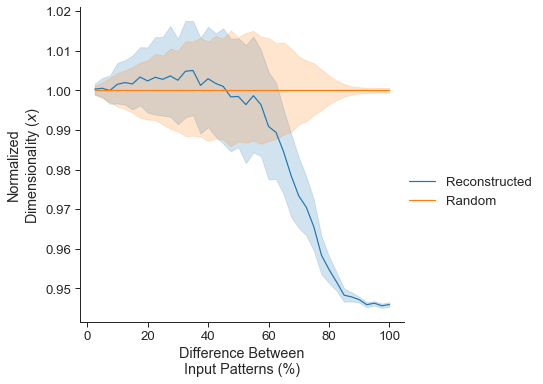

Height: 5.1, Aspect: 1.0784313725490198


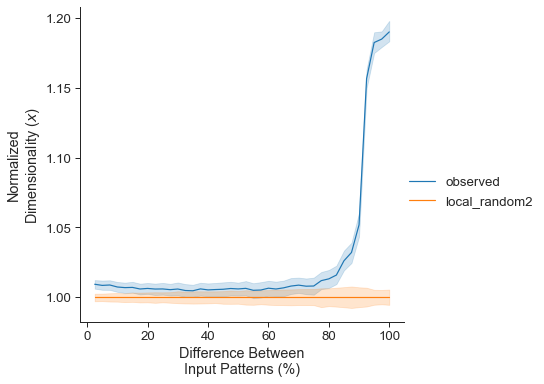

In [4]:

name_map = {
        'observed': "Reconstructed",
        'local_random2': "Random",
}

mpd = MyPlotData()
for model_name in [
        'observed',
        'local_random2',
    ]:
    resss = db[model_name]
    ress_tries = resss  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        ress = ress[0]
        for noise in ress:
#             if noise >= 1:
#                 continue
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            mpd.add_data_point(
                model_=name_map[model_name],
                model=model_name,
                noise=noise*100,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim_norm2=res['grc_dim']/avg_grc_dim[noise],
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                grc_pop_corr_norm=res['grc_pop_corr']/avg_pop_corr[noise],
#                 hamming_distance=res['hamming_distance'],
#                 hamming_distance_norm=res['hamming_distance']/f_means[model_name]/2,
#                 hamming_distance_norm2=res['hamming_distance']/f_stdev[model_name]/2,
#                 hamming_distance_norm3=res['hamming_distance']/f_stdev[model_name]/2/baseline_hd_norm2[noise]/1.77,
#                 normalized_mse=res['normalized_mse'],
# #                 grc_stdev_pct=1/res['grc_stdev_pct'],
#                 grc_stdev_pct=res['grc_stdev_pct'],
#                 grc_stdev_pct_norm=res['grc_stdev_pct'] / .0735,
                )


def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='upper right', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim_norm2',
    hue='model_',
    context='paper',
#     palette=palette,
#     log_scale_y=True,
#     ci='sd',
#     ci=95,
#     width=3.5, height=3.1,
    width=5.5, height=5.1,
#     ylim=[.925, 1.05],
#     ylim=[.85, 1.15],
    y_axis_label='Normalized\nDimensionality ($x$)',
    x_axis_label='Difference Between\nInput Patterns (%)',
#     title='noise',
#     save_filename=f'{script_n}_norm.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_pop_corr_norm',
    hue='model',
    context='paper',
    width=5.5, height=5.1,
    y_axis_label='Normalized\nDimensionality ($x$)',
    x_axis_label='Difference Between\nInput Patterns (%)',
#     save_filename=f'{script_n}_norm.svg',
    show=True,
    )


Height: 3.1, Aspect: 1.2903225806451613


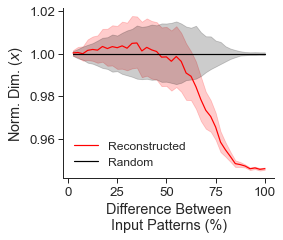

Height: 3.1, Aspect: 1.4838709677419353
/n/groups/htem2/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/plot_220726_across_noise_uniform_dim_wide.svg


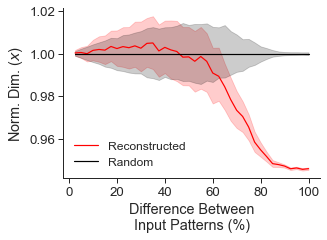

Height: 3.1, Aspect: 1.2096774193548387


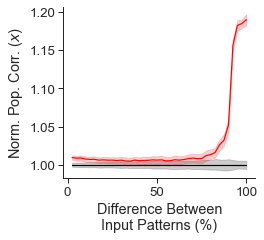

In [8]:

palette = {
    name_map['observed']: 'red',
    name_map['local_random2']: 'black',
}

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower left', frameon=False, fontsize=12)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim_norm2',
    hue='model_',
    context='paper',
    palette=palette,
#     width=3.75, height=3.1,
    width=4, height=3.1,
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='Difference Between\nInput Patterns (%)',
#     save_filename=f'{script_n}_dim.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_dim_norm2',
    hue='model_',
    context='paper',
    palette=palette,
#     width=3.75, height=3.1,
    width=4.6, height=3.1,
    y_axis_label='Norm. Dim. ($x$)',
    x_axis_label='Difference Between\nInput Patterns (%)',
#     save_filename=f'{script_n}_dim_wide.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_pop_corr_norm',
    hue='model_',
    context='paper',
    palette=palette,
    width=3.75, height=3.1,
    y_axis_label='Norm. Pop. Corr. ($x$)',
    x_axis_label='Difference Between\nInput Patterns (%)',
#     save_filename=f'{script_n}_pop_corr.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    custom_legend_fn=lambda x: None,
    )

Height: 3.1, Aspect: 1.2096774193548387


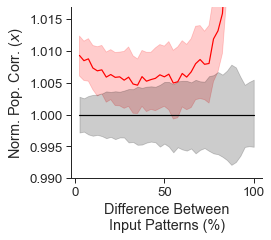

In [7]:


importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_pop_corr_norm',
    hue='model_',
    context='paper',
    palette=palette,
    width=3.75, height=3.1,
    ylim=[.99, 1.017],
    y_axis_label='Norm. Pop. Corr. ($x$)',
    x_axis_label='Difference Between\nInput Patterns (%)',
#     save_filename=f'{script_n}_pop_corr.svg',
    show=True,
#     custom_legend_fn=custom_legend_fn,
    custom_legend_fn=lambda x: None,
    )